In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
db = pd.read_csv('BostonHousing.csv')

In [3]:
db.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


<Axes: >

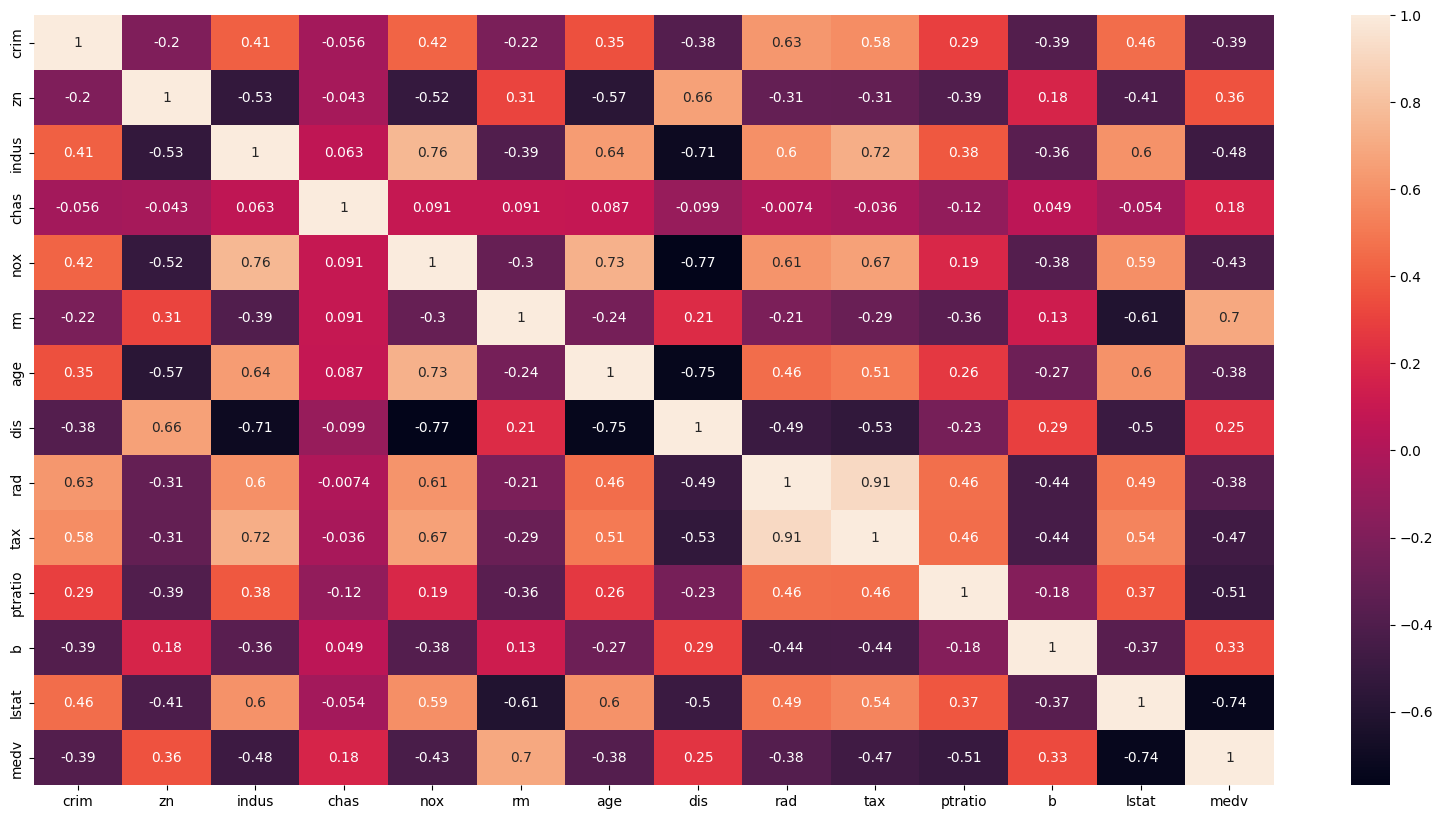

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(db.corr(),  annot=True)

Гистограммы по всем столбцам таблицы:

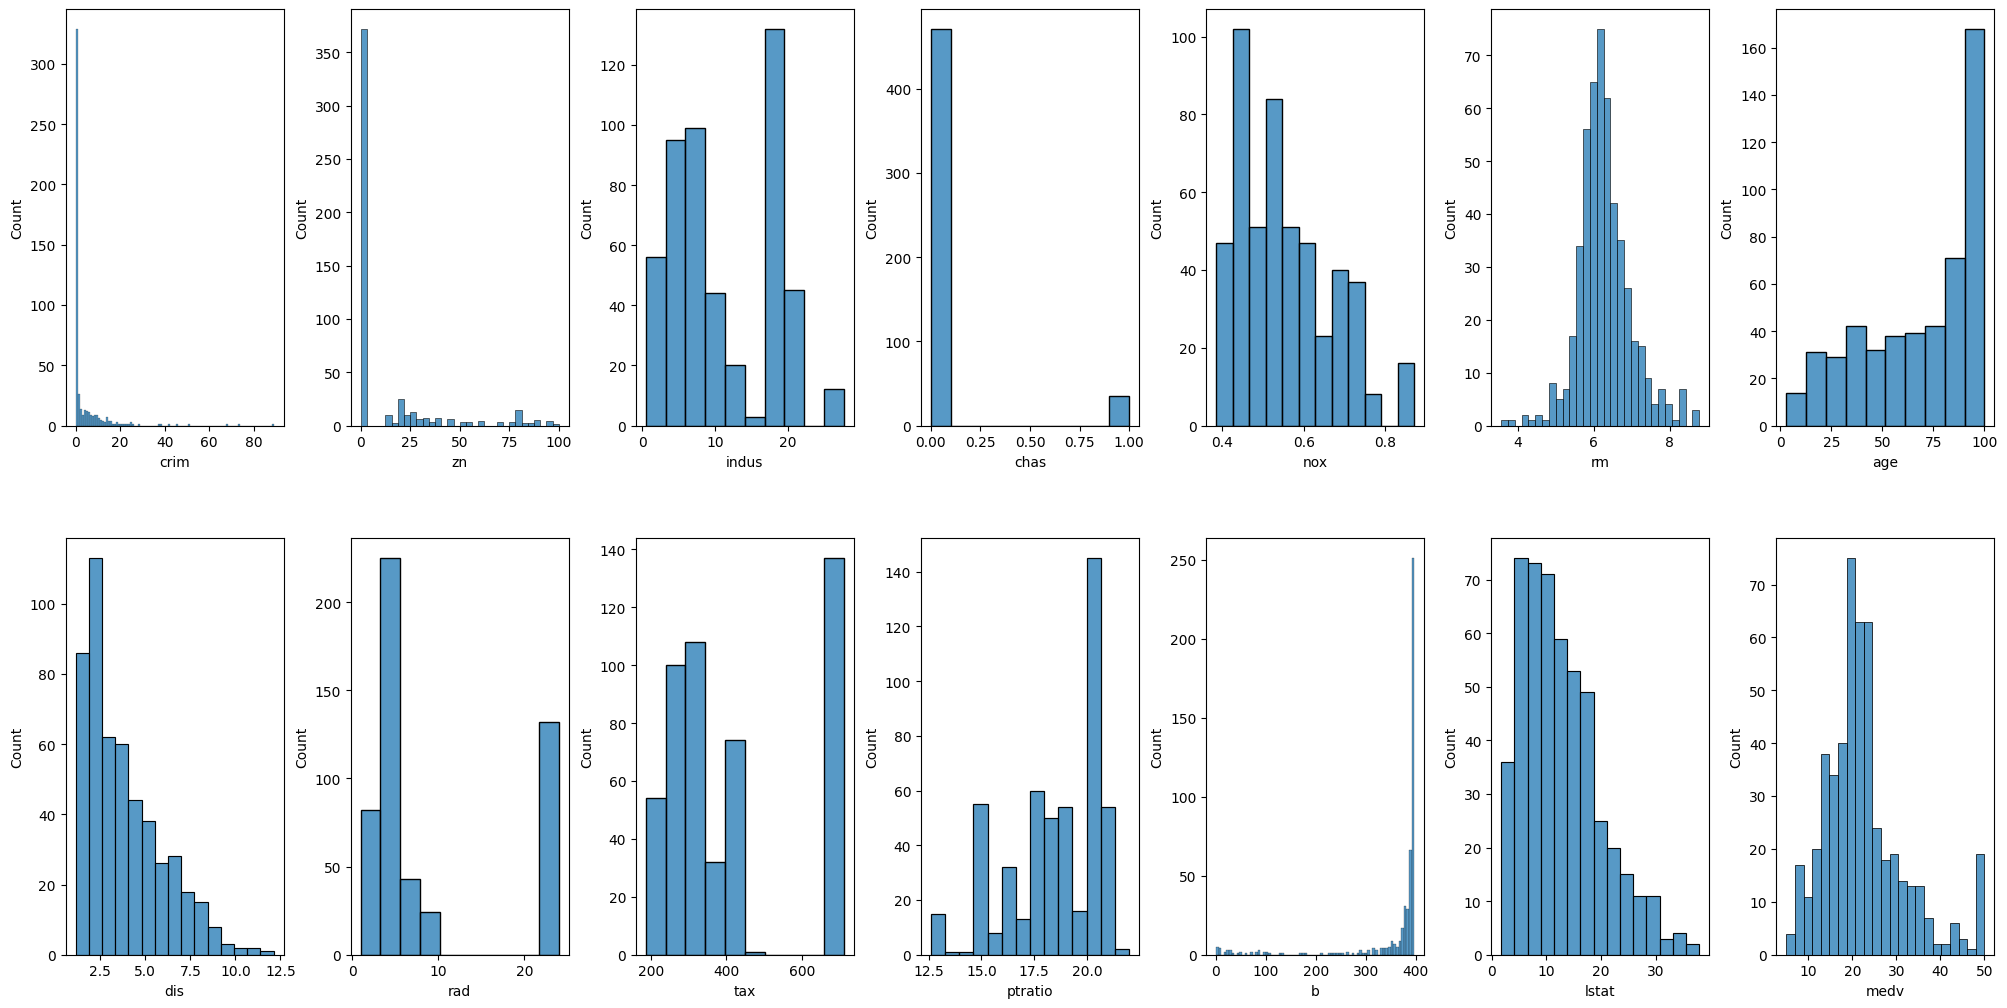

In [ ]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in db.items():
    sns.histplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

**Средняя стоимость** дома в зависимости от доступности реки (в тысячах) и на сколько процентов данное среднее значение меньше/больше общего среднего значения

           medv    average      baavg
           mean                      
chas                                 
0     22.093843  22.532806  -1.948108
1     28.440000  22.532806  26.215970


<Axes: xlabel='chas'>

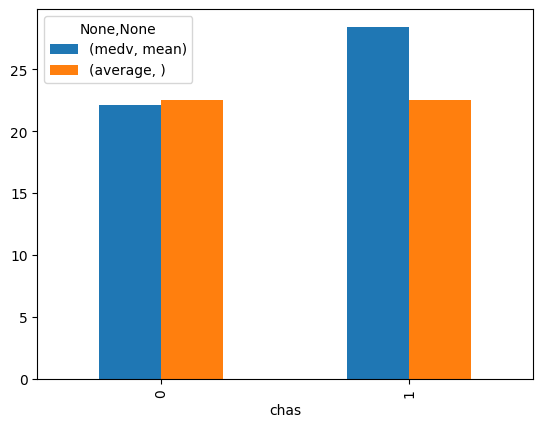

In [ ]:
medv_by_chas = db[['chas', 'medv']].groupby('chas').agg(['mean'])
medv_by_chas['average'] = float(db['medv'].agg(['mean']))
medv_by_chas['baavg'] = (medv_by_chas['medv']['mean'] - medv_by_chas['average']) / medv_by_chas['average'] * 100
print(medv_by_chas)
medv_by_chas[['medv', 'average']].plot.bar()

In [ ]:
db.lstat.describe()

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: lstat, dtype: float64

                 medv                 
                  min       mean   max
lstat                                 
(1.73, 6.95]     20.6  32.515079  50.0
(6.95, 11.36]    11.9  24.089683  50.0
(11.36, 16.955]  10.2  19.361111  30.7
(16.955, 37.97]   5.0  14.014961  27.5


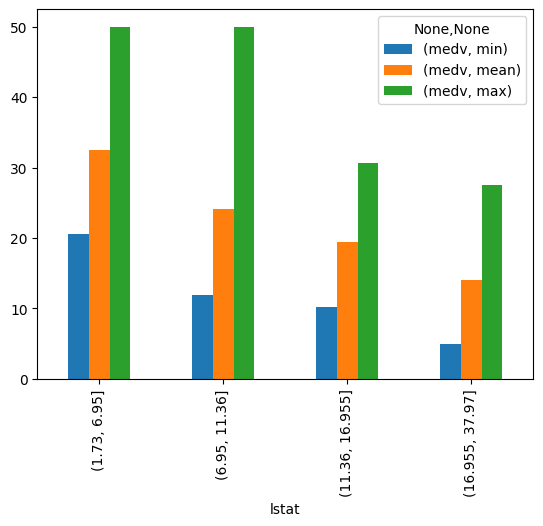

In [12]:
df_copy = db.copy()
bins = [1.73, 6.95, 11.36, 16.955, 37.97]
lables = ['rich', 'not so rich', 'not so poor', 'poor']
df_copy['lstat'] = pd.cut(df_copy['lstat'], bins, lables)
df_by_lstat = df_copy[['lstat', 'medv']].groupby('lstat').agg(['min', 'mean', 'max'])

df_by_lstat.plot.bar()

print(df_by_lstat)

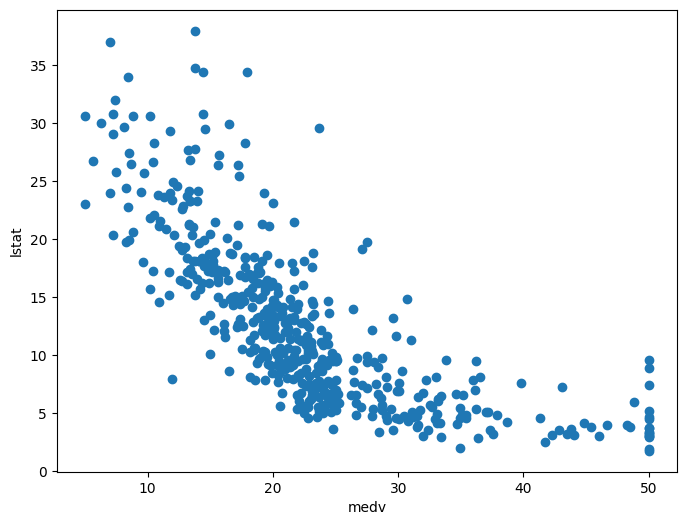

In [8]:
plt.figure(figsize = (8, 6))
plt.scatter(db['medv'], db['lstat'])
plt.xlabel('medv')
plt.ylabel('lstat')
plt.show()

In [ ]:
db.crim.describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: crim, dtype: float64

                  medv                 
                   min       mean   max
crim                                   
(0.00632, 0.082]  11.9  27.396825  50.0
(0.082, 0.257]     7.0  22.509524  38.7
(0.257, 3.677]    11.8  24.103968  50.0
(3.677, 88.976]    5.0  16.159843  50.0


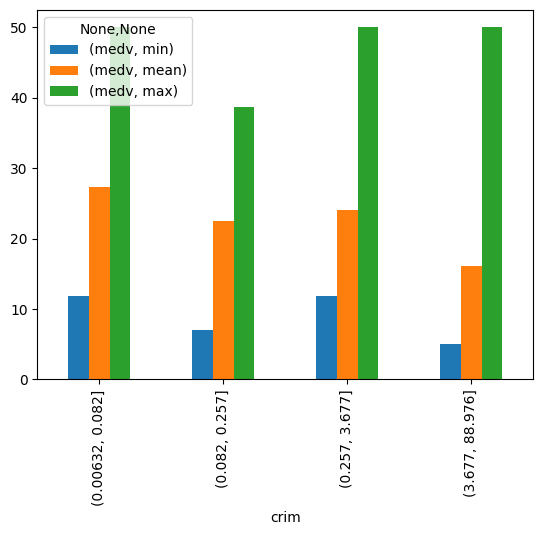

In [13]:
df_copy = db.copy()
bins = [0.00632, 0.082045, 0.25651, 3.677083, 88.976200]
lables = ['0-25', '25-50', '50-75', '75-100']
df_copy['crim'] = pd.cut(df_copy['crim'], bins, lables)
df_by_crim = df_copy[['crim', 'medv']].groupby('crim').agg(['min', 'mean', 'max'])
df_by_crim.plot.bar()
print(df_by_crim)

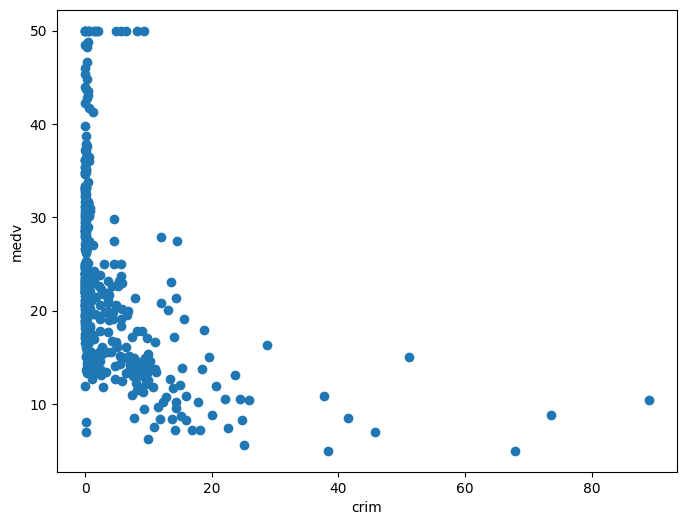

In [15]:
plt.figure(figsize = (8, 6))
plt.scatter( db['crim'], db['medv'])
plt.xlabel('crim')
plt.ylabel('medv')
plt.show()

In [23]:
db.rm.describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: rm, dtype: float64

        medv                 
         min       mean   max
rm                           
(3, 4]  13.4  19.683333  23.2
(4, 5]  12.7  21.760000  50.0
(5, 6]  12.5  21.800000  50.0
(6, 7]  13.3  20.287500  50.0
(7, 8]   8.5  13.988889  21.4
(8, 9]  11.5  17.750000  50.0


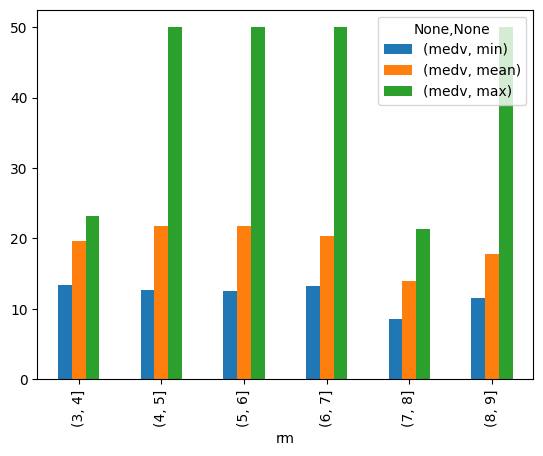

In [25]:
df_copy = db.copy()
bins = [3, 4, 5, 6, 7, 8, 9]

df_copy['rm'] = pd.cut(df_copy['crim'], bins, lables)
df_by_crim = df_copy[['rm', 'medv']].groupby('rm').agg(['min', 'mean', 'max'])
df_by_crim.plot.bar()
print(df_by_crim)

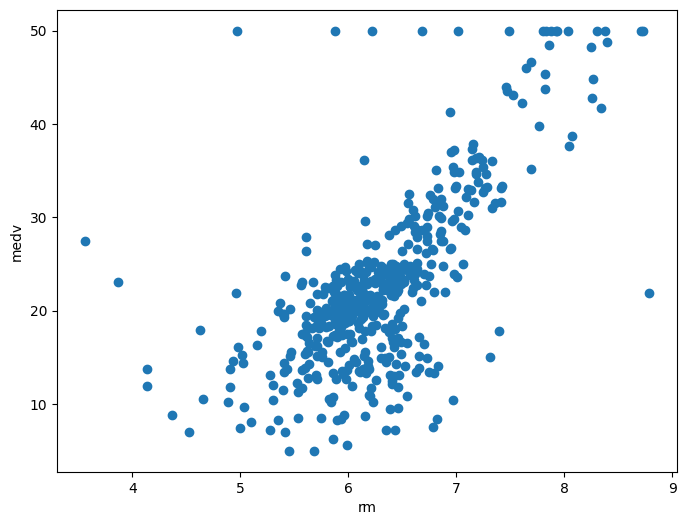

In [22]:
plt.figure(figsize = (8, 6))
plt.scatter( db['rm'], db['medv'])
plt.xlabel('rm')
plt.ylabel('medv')
plt.show()

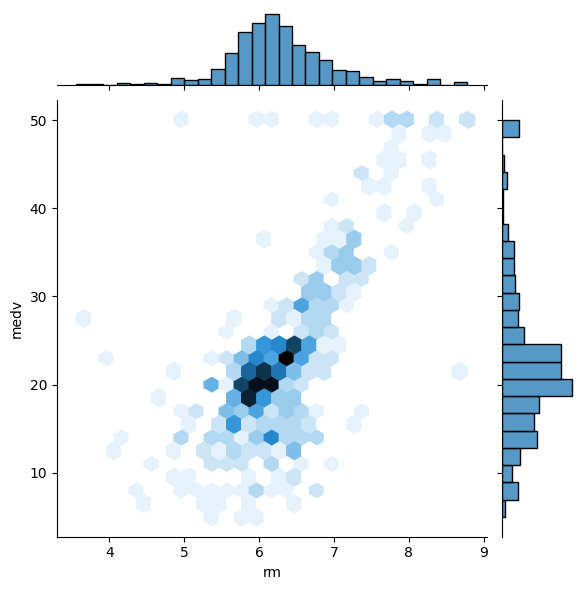

In [27]:
sns.jointplot(x = db['rm'], y = db['medv'], kind = 'hex')

ВЫВОДЫ:
1. Стоимость домов у реки на 26% больше средней, а стоимость домов без доступа к реке - почти на 2 % меньше
2. Прослеживается хорошая зависимость между ценой на дом и долей населения более низкого статуса жизни. Чем меньше доля - тем больше стоимость
3. Анализ коэфициента криминальности не привёл к выводу какой либо зависимости, потому что в большинстве случаев он очень низкий или просто низкий
4. Найдена зависимость между количеством комнат и ценой, однако, как видно из последнего графика, дома стоимостью примерно 20-20 тыс. дол. и с 6-7 комнатами достаточно популярны в Бостоне.